__Finding time series for categories categories:__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [2]:
drct = '/home/somayeh/Documents/Career/Data_Incubator/Project/'

filename3 = 'uspatentcitation.tsv'

In [3]:
filename = drct+'group_id_patent_list'
with open(filename, 'rb') as f:
    group_id_patent_list = pickle.load(f)

def slicedict(d, s):
    return {k:v for k,v in d.items() if k.startswith(s)}

H04_group = slicedict(group_id_patent_list, 'H04')

In [4]:
# h04_group_patent_ids =  []
# for key in H04_group.keys():
#     h04_group_patent_ids.append(H04_group[key])
    
# h04_group_patent_ids = [item for items in h04_group_patent_ids for item in items]

In [5]:
list(H04_group.keys())

['H04B',
 'H04L',
 'H04W',
 'H04N',
 'H04J',
 'H04R',
 'H04H',
 'H04M',
 'H04Q',
 'H04S',
 'H04K']

In [11]:
H1 = H04_group[list(H04_group.keys())[7]]

In [6]:
df_chunk = pd.read_csv(drct+filename3,sep='\t',header=0, chunksize=1000000)
patent_list3 = []  
for cnt, chunk in enumerate(df_chunk):
    print(cnt)    
    chunk.drop(['patent_id','citation_id','uuid', 'name', 'kind','country','category','sequence'], axis=1)
    chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
    patent_list3.append(chunk['year'])
    
year_all = pd.concat(patent_list3)
del patent_list3    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


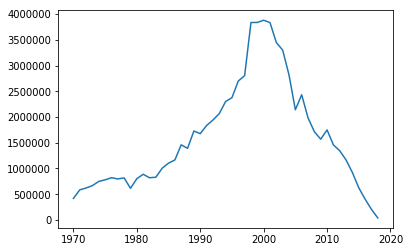

In [8]:
HH = np.histogram(year_all[(year_all<2020)&(year_all>=1970)],49)
plt.plot(HH[1][:-1],HH[0])

In [12]:
def citation_list(filename, H1):
    df_chunk = pd.read_csv(filename,sep='\t',header=0, chunksize=1000000)
    patent_list3 = []  
    for cnt, chunk in enumerate(df_chunk):
#         print(cnt)
        chunk.drop(['uuid', 'name', 'kind','country','category','sequence'], axis=1)
        chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
        chunk = chunk[(chunk.year>=1970)] 
        chunk = chunk.loc[chunk['citation_id'].str.isnumeric()]
        chunk['citation_id'] = chunk['citation_id'].astype(int)
        chunk = chunk.loc[pd.to_numeric(chunk['citation_id']).isin(H1)]
        patent_list3.append(chunk[['citation_id','year']])
    df3 = pd.concat(patent_list3)
    del patent_list3
    return(df3)

In [17]:
citation_hist = {}
for hkey in H04_group.keys():
    print(hkey)
    H1 = H04_group[hkey]
    df = citation_list(drct+filename3, H1)
    yrs = df.year
    h = np.histogram(yrs[(yrs<2020)&(yrs>=1970)],49)
    citation_hist[hkey] = h[0]
    del (df ,yrs)
    

H04B
H04L
H04W
H04N
H04J
H04R
H04H
H04M
H04Q
H04S
H04K


In [50]:
import pickle
with open(drct+'citation_hist2', 'wb') as f:
    pickle.dump((citation_hist, HH), f)

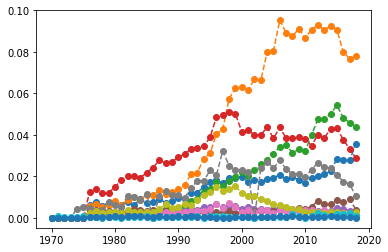

In [48]:
for hkey in citation_hist.keys():
    H1 = citation_hist[hkey]
#     if len(H04_group[hkey])>50000:
    h = np.divide(H1,HH[0])
    plt.plot(HH[1][:-1],h, 'o--')
plt.show()

In [22]:
citation_hist.keys()

dict_keys(['H04B', 'H04L', 'H04W', 'H04N', 'H04J', 'H04R', 'H04H', 'H04M', 'H04Q', 'H04S', 'H04K'])

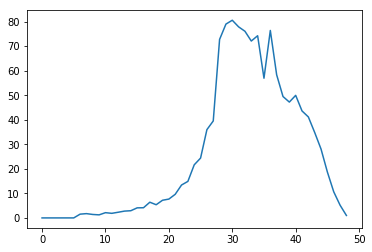

In [30]:
plt.plot(citation_hist['H04L']/citation_hist['H04L'][-1])

In [28]:
for hkey in citation_hist.keys():
    print(citation_hist[hkey])

[    4     2     7     2     2     8  4999  6275  4773  4557  5380  5319
  6357  5125  9116  7925  8948 13276 10228 14406 15949 16675 22964 25235
 34583 40557 49632 47034 73315 74461 76874 66420 62355 56458 52150 41210
 50704 36892 33964 28627 29229 28365 27037 24430 20749 17705 11307  5698
  1392]
[     1      3      6      2     10      4   4649   5296   4269   3784
   6480   5671   7004   8413   8892  12436  12586  19395  16296  21825
  23272  29168  40663  45133  65615  73938 109078 119804 220585 239504
 244267 236099 230644 218583 225127 172626 231645 176851 150014 143137
 151454 132192 124773 105537  85052  56699  32295  15763   3033]
[    1     1     0     0     1     1   301   501   614   864   559   592
   655  1454  1402  1719  1478  5642  5796  7528  7640  9322 16052 18742
 28401 33203 46629 43507 68810 75972 85853 77845 78849 85286 78200 66267
 83240 69434 53864 51796 56501 58234 63829 55283 46063 33884 19527  9420
  1702]
[     6      6      7      9     13     23  10232  

In [49]:
HH[0]

array([ 418176,  584023,  620502,  667016,  748860,  779166,  820613,
        796782,  816382,  614377,  801220,  886924,  819772,  829839,
       1005030, 1103388, 1165439, 1459650, 1391214, 1727934, 1676337,
       1834249, 1941293, 2066094, 2301124, 2375922, 2699840, 2803533,
       3836949, 3838055, 3881078, 3836052, 3447488, 3301252, 2817622,
       2141061, 2432725, 1983267, 1714522, 1569289, 1749472, 1458154,
       1344022, 1164706,  920318,  624812,  403907,  205508,   38934])